In [0]:
import keras
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, AveragePooling2D
from tensorflow.keras. models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import InceptionV3, Xception, ResNet50, VGG16, VGG19

In [13]:
init_learning_rate = 1e-3
total_epochs = 10
batch = 16

base_model = VGG16(weights="imagenet", include_top=False, input_tensor=Input(shape=(512, 512, 3)))
#base_model.summary()

head = base_model.output
head = AveragePooling2D(pool_size = (4, 4))(head)
head = Flatten(name = "flatten")(head)
head = Dense(64, activation = "relu")(head)
head = Dropout(0.5)(head)
head = Dense(2, activation = "softmax")(head)

model = Model(inputs = base_model.input, outputs = head)

for layer in base_model.layers:
    layer.trainable = False
    

58892288/58889256 [==============================] - 1s 0us/step


In [14]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 512, 512, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 512, 512, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 512, 512, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 256, 256, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 256, 256, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 256, 256, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 128, 128, 128)     0   

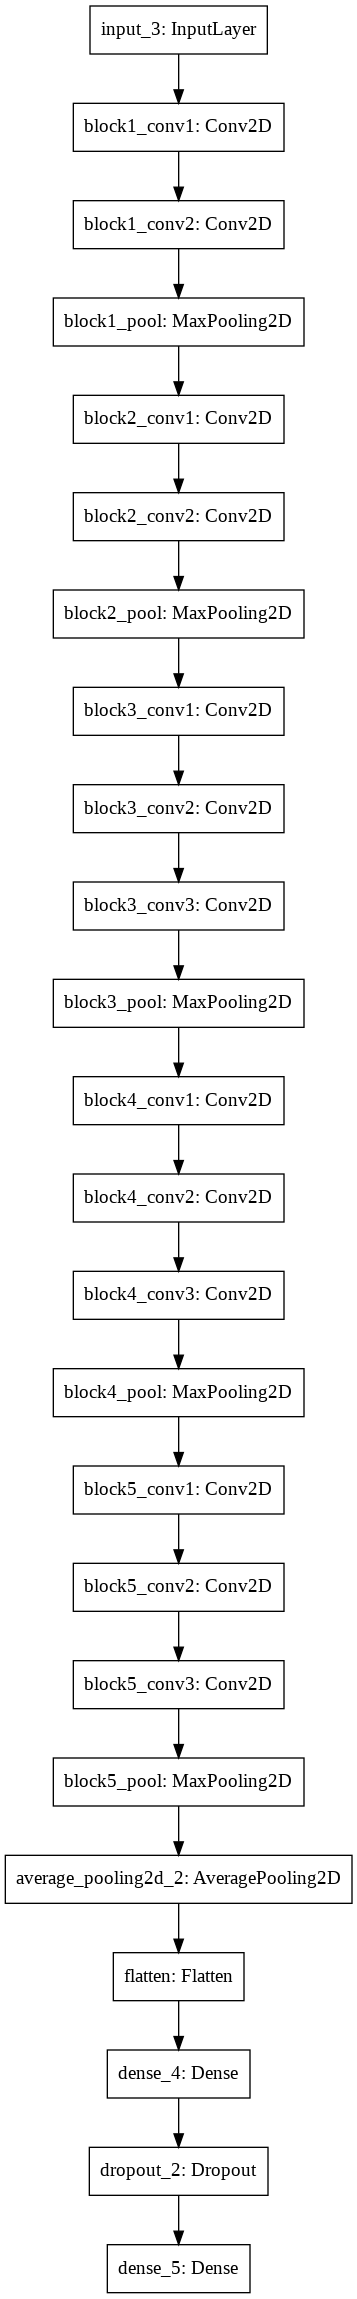

In [15]:
tf.keras.utils.plot_model(model, 'Wazir_first_model.png')